In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_rcv1
from sklearn.model_selection import train_test_split

import numpy as np

rcv1 = fetch_rcv1()
target_names = rcv1.target_names

selected_categories = ['ECAT', 'GCAT', 'MCAT', 'CCAT']
selected_indices = [list(target_names).index(cat) for cat in selected_categories]


targets_dense = rcv1.target.toarray()
num_samples_per_category = 500

sampled_indices = np.array([], dtype=int)

for category_index in selected_indices:
    category_indices = np.where(targets_dense[:, category_index])[0]
    sampled_category_indices = np.random.choice(category_indices, num_samples_per_category, replace=False)
    sampled_indices = np.union1d(sampled_indices, sampled_category_indices)

sampled_data = rcv1.data[sampled_indices]
sampled_targets = targets_dense[sampled_indices][:, selected_indices]



In [30]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sampled_data, sampled_targets, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train.toarray(), dtype=torch.float32)
X_test = torch.tensor(X_test.toarray(), dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)



In [31]:
class RCV1Classifier(nn.Module):
    def __init__(self, num_features, num_classes):
        super(RCV1Classifier, self).__init__()
        self.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.fc(x)

num_features = X_train.shape[1]
num_classes = y_train.shape[1]
model = RCV1Classifier(num_features, num_classes)

In [43]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adagrad(model.parameters(), lr=0.01)

In [44]:
num_epochs = 1000  # Define the number of epochs
losses = []  # List to store loss values

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}")


Epoch 1/1000, Loss: 0.1354411208629608
Epoch 2/1000, Loss: 0.12437093526124954
Epoch 3/1000, Loss: 0.11938917845487594
Epoch 4/1000, Loss: 0.11609874188899993
Epoch 5/1000, Loss: 0.11365674078464508
Epoch 6/1000, Loss: 0.11169925928115845
Epoch 7/1000, Loss: 0.1100693666934967
Epoch 8/1000, Loss: 0.10866238534450531
Epoch 9/1000, Loss: 0.10741194427013397
Epoch 10/1000, Loss: 0.10630303114652634
Epoch 11/1000, Loss: 0.10529062718153
Epoch 12/1000, Loss: 0.10435746401548386
Epoch 13/1000, Loss: 0.10348356276750564
Epoch 14/1000, Loss: 0.10267279028892518
Epoch 15/1000, Loss: 0.10190613925457001
Epoch 16/1000, Loss: 0.10119539916515351
Epoch 17/1000, Loss: 0.10051216185092926
Epoch 18/1000, Loss: 0.09985201835632324
Epoch 19/1000, Loss: 0.09922445744276047
Epoch 20/1000, Loss: 0.09863197982311249
Epoch 21/1000, Loss: 0.09805085867643357
Epoch 22/1000, Loss: 0.09751102060079575
Epoch 23/1000, Loss: 0.09696439445018769
Epoch 24/1000, Loss: 0.09643642157316208
Epoch 25/1000, Loss: 0.0959420

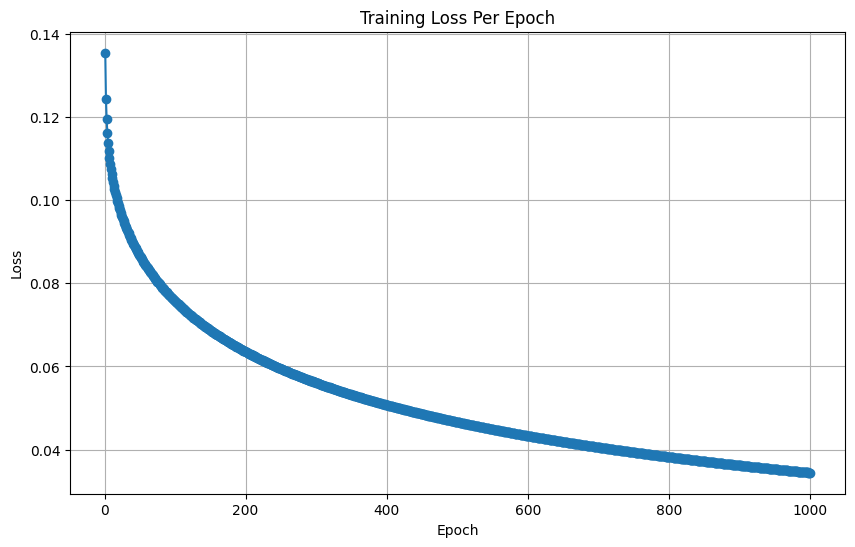

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), losses, marker='o')
plt.title('Training Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [47]:
def l1_regularization(model, lambda_l1):
    l1_norm = sum(p.abs().sum() for p in model.parameters())
    return lambda_l1 * l1_norm

lambda_l1 = 0.01  
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        l1_loss = l1_regularization(model, lambda_l1)
        total_loss = loss + l1_loss
        total_loss.backward()
        optimizer.step()
        total_loss += total_loss.item()

    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}")


Epoch 1/1000, Loss: 21.94324493408203
Epoch 2/1000, Loss: 21.44912338256836
Epoch 3/1000, Loss: 20.944501876831055
Epoch 4/1000, Loss: 20.488122940063477
Epoch 5/1000, Loss: 20.028806686401367
Epoch 6/1000, Loss: 19.600534439086914
Epoch 7/1000, Loss: 19.180158615112305
Epoch 8/1000, Loss: 18.778993606567383
Epoch 9/1000, Loss: 18.385345458984375
Epoch 10/1000, Loss: 18.00902557373047
Epoch 11/1000, Loss: 17.636789321899414
Epoch 12/1000, Loss: 17.28107452392578
Epoch 13/1000, Loss: 16.931554794311523
Epoch 14/1000, Loss: 16.593982696533203
Epoch 15/1000, Loss: 16.26023292541504
Epoch 16/1000, Loss: 15.937487602233887
Epoch 17/1000, Loss: 15.620709419250488
Epoch 18/1000, Loss: 15.314117431640625
Epoch 19/1000, Loss: 15.0107421875
Epoch 20/1000, Loss: 14.718277931213379
Epoch 21/1000, Loss: 14.43147087097168
Epoch 22/1000, Loss: 14.15266227722168
Epoch 23/1000, Loss: 13.875898361206055
Epoch 24/1000, Loss: 13.608677864074707
Epoch 25/1000, Loss: 13.346312522888184
Epoch 26/1000, Loss: 

In [52]:
def l1_regularization(model, lambda_l1):
    l1_norm = sum(p.abs().sum() for p in model.parameters())
    return lambda_l1 * l1_norm
lambda_l1 = 0.01  # L1 regularization strength
lambda_l2 = 0.01  # L2 regularization strength (weight_decay parameter)
num_epochs = 1000

losses_no_reg = []
losses_l1 = []
losses_l2 = []

# Function to run a training loop
def train_model(regularization_type=None):
    model.train()  # Initialize your model
    optimizer = optim.Adagrad(model.parameters(), lr=0.01, weight_decay=(lambda_l2 if regularization_type == 'L2' else 0))
    losses = []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            if regularization_type == 'L1':
                loss += l1_regularization(model, lambda_l1)

            total_loss += loss.item()
            loss.backward()
            optimizer.step()

        avg_loss = total_loss / len(train_loader)
        losses.append(avg_loss)
    
    return losses

# Train with different regularizations
losses_no_reg = train_model()
losses_l1 = train_model('L1')
losses_l2 = train_model('L2')


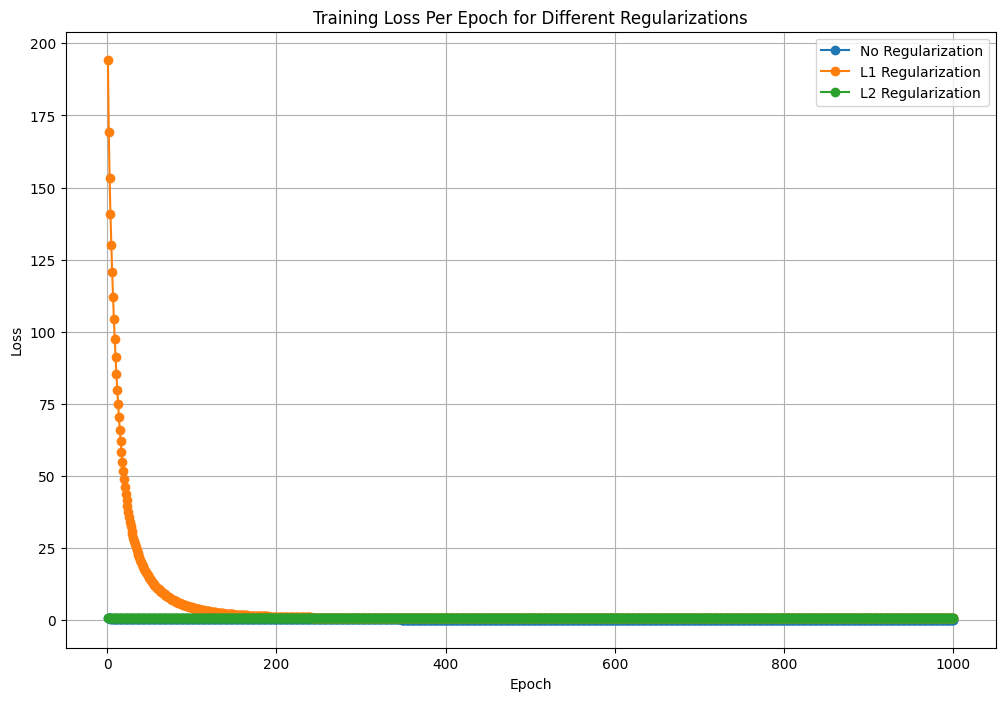

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(range(1, num_epochs + 1), losses_no_reg, marker='o', label='No Regularization')
plt.plot(range(1, num_epochs + 1), losses_l1, marker='o', label='L1 Regularization')
plt.plot(range(1, num_epochs + 1), losses_l2, marker='o', label='L2 Regularization')
plt.title('Training Loss Per Epoch for Different Regularizations')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# Assuming your model is named 'model'
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)

num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}")


Epoch 1/1000, Loss: 0.6195575404167175
Epoch 2/1000, Loss: 0.6191169095039367
Epoch 3/1000, Loss: 0.6186586499214173
Epoch 4/1000, Loss: 0.6181951713562012
Epoch 5/1000, Loss: 0.6176948118209838
Epoch 6/1000, Loss: 0.6172062277793884
Epoch 7/1000, Loss: 0.6167417240142822
Epoch 8/1000, Loss: 0.6162743449211121
Epoch 9/1000, Loss: 0.615802891254425
Epoch 10/1000, Loss: 0.6153473711013794
Epoch 11/1000, Loss: 0.6148738765716553
Epoch 12/1000, Loss: 0.61439861536026
Epoch 13/1000, Loss: 0.6139430522918701
Epoch 14/1000, Loss: 0.6134840989112854
Epoch 15/1000, Loss: 0.6129955387115479
Epoch 16/1000, Loss: 0.6125452661514282
Epoch 17/1000, Loss: 0.6120837020874024
Epoch 18/1000, Loss: 0.6116287064552307
Epoch 19/1000, Loss: 0.6111887431144715
Epoch 20/1000, Loss: 0.6106938219070435
Epoch 21/1000, Loss: 0.6102323603630065
Epoch 22/1000, Loss: 0.6097892761230469
Epoch 23/1000, Loss: 0.6093375396728515
Epoch 24/1000, Loss: 0.6088624262809753
Epoch 25/1000, Loss: 0.6084155106544494
Epoch 26/100

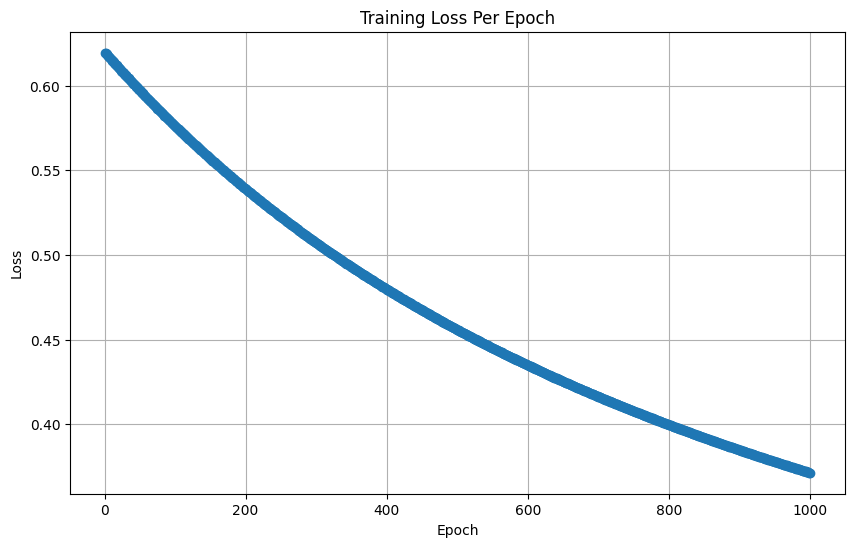

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), losses, marker='o')
plt.title('Training Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()